В этом уроке вы на практике познакомитесь с центральной предельной теоремой.

После изучения этого урока вы будете знать, что сумма достаточно большого количества слабо зависимых случайных величин, имеющих примерно одинаковые масштабы (ни одно из слагаемых не доминирует, не вносит в сумму определяющего вклада), имеет распределение, близкое к нормальному.


# Постановка задачи

Сгенерировать большое число независимых случайных величин, имеющих распределение Бернулли. Показать, что их сумма по распределению близка к нормальному.

**Центральные предельные теоремы** (ЦПТ) - класс теорем в теории вероятностей, утверждающих, что сумма достаточно большого количества слабо зависимых случайных величин, имеющих примерно одинаковые масштабы (ни одно из слагаемых не доминирует, не вносит в сумму определяющего вклада), имеет распределение, близкое к нормальному.

Так как многие случайные величины в приложениях формируются под влиянием нескольких слабо зависимых случайных факторов, их распределение считают нормальным. При этом должно соблюдаться условие, что ни один из факторов не является доминирующим. Центральные предельные теоремы в этих случаях обосновывают применение нормального распределения.

Пусть $X_{1},\ldots ,X_{n},\ldots$  есть бесконечная последовательность независимых одинаково распределённых случайных величин, имеющих конечное математическое ожидание $\mu$ и дисперсию $\sigma ^{2}$. Пусть также

$$S_{n}=\sum \limits _{i=1}^{n}X_{i}.$$
Тогда

$$\frac  {S_{n}-\mu n}{\sigma {\sqrt  n}}\to N(0,1) \text{ по распределению при  } n\to \infty,$$
где $N(0,1)$ - нормальное распределение с нулевым математическим ожиданием и стандартным отклонением, равным единице.

Определяя выборочное среднее первых $n$ величин как

$${\bar {X}}_{n}={\frac {1}{n}}\sum \limits _{i=1}^{n}X_{i},$$
мы можем переписать результат центральной предельной теоремы в следующем виде:

$$\sqrt {n}\;{\frac {{\bar {X}}_{n}-\mu }{\sigma }}\to N(0,1)  \text{ по распределению при  } n\to \infty.$$

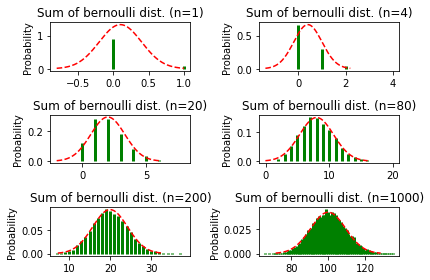

In [1]:
# -*- coding: utf-8 -*- https://russianblogs.com/article/17171673717/
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def sampling2pmf(n, dist, t=10000):
  ber_dist = dist
  sum_of_samples = []
  for i in range(t):
    samples = ber_dist.rvs(size=n)  # Имеет тот же эффект, что каждый раз принимать одно значение n раз
    sum_of_samples.append(np.sum(samples))
  val, cnt = np.unique(sum_of_samples, return_counts=True)
  pmf = cnt / len(sum_of_samples)
  return val, pmf

def plot(n, dist, subplot, plt_handle):
  bins = 1000
  plt = plt_handle
  plt.subplot(subplot)
  mu = n * dist.mean()
  sigma = np.sqrt(n * dist.var())
  samples = sampling2pmf(n=n, dist=dist)
  plt.vlines(samples[0], 0, samples[1], colors='g', linestyles='-', lw=3)
  plt.ylabel('Probability')
  plt.title('Sum of bernoulli dist. (n={})'.format(n))
  # normal distribution
  norm_dis = stats.norm(mu, sigma)
  norm_x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, bins)
  pdf1 = norm_dis.pdf(norm_x)
  plt.plot(norm_x, pdf1, 'r--')
  return plt
 
size = [1, 4, 20, 80, 200, 1000]

# sum of bernoulli distribution
dist_type = 'bern'
bern_para = [0.1]
single_sample_dist = stats.bernoulli(p=bern_para[0])  #  Определите распределение Бернулли

#  Ниже показано использование matplotlib для рисования
plt.figure(1)
plt = plot(n=size[0], dist=single_sample_dist, subplot=321, plt_handle=plt)
plt = plot(n=size[1], dist=single_sample_dist, subplot=322, plt_handle=plt)
plt = plot(n=size[2], dist=single_sample_dist, subplot=323, plt_handle=plt)
plt = plot(n=size[3], dist=single_sample_dist, subplot=324, plt_handle=plt)
plt = plot(n=size[4], dist=single_sample_dist, subplot=325, plt_handle=plt)
plt = plot(n=size[5], dist=single_sample_dist, subplot=326, plt_handle=plt)
plt.tight_layout()
plt.savefig('sum_of_{}_dist.png'.format(dist_type), dpi=200)